## Setup

In [2]:
print("hello world")

hello world


In [27]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.13.1+cpu


## Tensor type

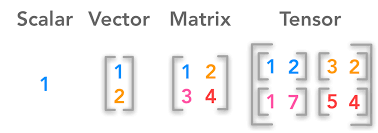

### Scalar

In [4]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
scalar.ndim

0

In [6]:
scalar.item()

7

### Vector

In [7]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [8]:
vector.ndim, vector.shape

(1, torch.Size([2]))

### MATRIX

In [9]:
MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
MATRIX.ndim, MATRIX.shape

(2, torch.Size([2, 2]))

In [11]:
MATRIX[0]

tensor([7, 8])

### TENSOR

In [12]:
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
TENSOR.ndim, TENSOR.shape

(3, torch.Size([1, 3, 3]))

In [14]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random tensors

In [15]:
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.5589, 0.2031, 0.5924, 0.8601],
        [0.9113, 0.6773, 0.2537, 0.8337],
        [0.3824, 0.0579, 0.6777, 0.7179]])

In [16]:
random_tensor.ndim

2

In [17]:
# Create a tandom tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3)) # h,w, colour channels (r,g,b)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Other methods

In [18]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [19]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [20]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [21]:
one_to_ten = torch.arange(start=1,end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor datatypes

In [24]:
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                                dtype=None, # datatype
                                device=None, # cput / gpu / cuda
                                requires_grad=False) # track gradients
float_32_tensor, float_32_tensor.dtype

(tensor([3., 6., 9.]), torch.float32)

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3,6,9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.])

## Getting information from tensors

In [ ]:
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.7898, 0.7835, 0.5309, 0.7678],
        [0.3435, 0.8464, 0.6400, 0.7181],
        [0.1409, 0.3365, 0.5492, 0.0565]])

In [ ]:
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.size()}") # equal to shape
print(F"Device tensor is on: {some_tensor.device}")

tensor([[0.7898, 0.7835, 0.5309, 0.7678],
        [0.3435, 0.8464, 0.6400, 0.7181],
        [0.1409, 0.3365, 0.5492, 0.0565]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


## Manipulating tensors (tensors operations)

### Basic operations

In [ ]:
tensor = torch.tensor([1,2,3])
tensor+10

tensor([11, 12, 13])

In [ ]:
tensor*10

tensor([10, 20, 30])

In [ ]:
tensor-10

tensor([-9, -8, -7])

### Matrix moltiplication
### http://matrixmultiplication.xyz/

In [ ]:
print(tensor,"*",tensor)
print(F"= {tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
= tensor([1, 4, 9])


In [ ]:
# Matrix moltiplication
torch.matmul(tensor,tensor)

tensor(14)

In [ ]:
# Matrix moltiplication by hand
1*1 + 2*2 + 3*3

14

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
value

CPU times: total: 0 ns
Wall time: 997 µs


tensor(14)

In [ ]:
%%time
torch.matmul(tensor,tensor) # torch.mm

CPU times: total: 0 ns
Wall time: 995 µs


tensor(14)

In [ ]:
tensor @ tensor

tensor(14)

### One of the most commor error in deep learning is "shape error"

In [ ]:
tensor_A = torch.tensor([
                        [1,2],
                        [3,4],
                        [5,6]
                        ])

tensor_B = torch.tensor([
                        [7,10],
                        [8,11],
                        [9,12]
                        ])

print(tensor_A.shape, tensor_B.shape)

tensor_A @ tensor_B

torch.Size([3, 2]) torch.Size([3, 2])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [ ]:
# To fix tensor shape issues, we can manipulate the shape using transpose
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [ ]:
tensor_A @ tensor_B.T

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [ ]:
(tensor_A @ tensor_B.T).shape

torch.Size([3, 3])

### Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
x = torch.arange(0, 100, 10)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [ ]:
x.min()

tensor(0)

In [ ]:
x.argmin() # index position

tensor(0)

In [ ]:
x.max()

tensor(90)

In [ ]:
x.argmax() # index position

tensor(9)

In [ ]:
x.type(torch.float32).mean()

tensor(45.)

In [ ]:
x.sum()

tensor(450.)

### Reshaping, view, stacking, sqeezing. unsqueezing and permute tensors

In [ ]:
# Create a tensor
x = torch.arange(1.,10,)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Reshape a tensor
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# View of a tensor
z = x.view(1,9)
z, z.shape

# Changing z changes x because a view of a tensor 
# shares the same memory as the orginal

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
z[:,0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# Squeeze tensors
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
x_squeezed = x_reshaped.squeeze()
x_squeezed, x_squeezed.shape

(tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Unsqueeze - add a dimension at a specific dim
x_squeezed.unsqueeze(dim=1), x_squeezed.unsqueeze(dim=1).shape

(tensor([[5.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [ ]:
# Permute - rearrenges the dim of a tenos in a specific order
x_original = torch.rand(size=(224,224,3)) # h,w, colour_ch

x_permuted = x_original.permute(2,0,1) # shifts dim

x_permuted.shape

torch.Size([3, 224, 224])

### Indexing (selecting data from tensors)

In [ ]:
# Create a tensor
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[0,0]

tensor([1, 2, 3])

In [ ]:
x[0][0][0]

tensor(1)

In [ ]:
# ":" select "all" of a target dim
x[0,0,:]

tensor([1, 2, 3])

## Pytorch & NumPy

### NumPy to tensor

In [ ]:
# NumPy array to tensor
array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
tensor.dtype # default dtype for torch is float32

torch.float64

In [ ]:
tensor = torch.from_numpy(array).type(torch.float32)
tensor.dtype

torch.float32

In [ ]:
# Change data of array
array = array + 1 # add 1 to alle elements
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

### Tensor to NumPy

In [ ]:
tensor = torch.ones(7)
tensor

tensor([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In [ ]:
# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED) # if you want to set the randomness manually, you need to call this everytime you cal a random function
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])